In [1]:
import numpy as np 
import pandas as pd 

In [3]:
df=pd.read_csv("C:/Users/Preetha/OneDrive/Desktop/Stock.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [6]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [7]:
df.shape

(1258, 15)

In [8]:
df1=df.reset_index()["close"]

In [9]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [10]:
df1.shape

(1258,)

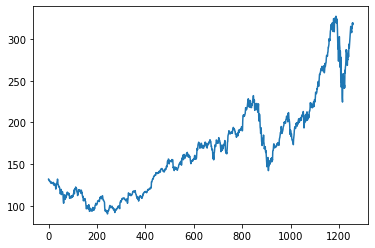

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

# Data Preprocessing

In [12]:
#LSTM are sensitive to the scaled data, so we apply minmax scaler
from sklearn.preprocessing import MinMaxScaler
#to set the range of values between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1258, 1)

# Splitting the dataset into training and testing set

In [14]:
#splitting the dataset into training and test consecutively as it is an time series problem
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [17]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [18]:
def create_dataset(dataset,time_step=1):
    #Convert an array of values into a dataset matrix
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]   #i=0 then values will be from "i" to "n-1" will be in "x" and "n" will be in "y".
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX) , np.array(dataY)

In [19]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [20]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [21]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [22]:
X_test.shape , y_test.shape

((340, 100), (340,))

In [23]:
#reshape the input to be [samples , time_step , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [ ]:
model.summary()

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

# Predicting the values

In [ ]:
#Doing prediction and checking performance matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Inverse transforming the values back to original
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculating RMS performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
#RMS for test data
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Here "Blue" line represents the whole dataset , "Yellow" line represents the training data and "Green" line represents the predicted values

# Predicting the values for next 30 days

In [27]:
len(test_data)

441

In [28]:
#because if we predict the output for next 30 days we will use the previous 100 days values for prediction so from 341 to 441 we have the data of previous 100 days
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [42]:
day_new=np.arange(1,101)
#taking the next 30 values as per predictions
day_pred=np.arange(101,131)

In [43]:
len(df1)

1258

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

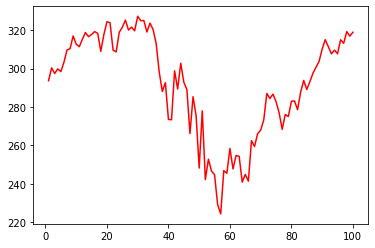

In [44]:
#Plotting for the previous values in the dataset
plt.plot(day_new,scaler.inverse_transform(df1[1158:]) , color="red")
#Plotting for the predicted values
plt.plot(day_pred,scaler.inverse_transform(lst_output) , color="green")

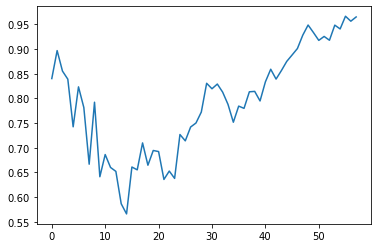

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:] )

In [46]:
df3=scaler.inverse_transform(df3).tolist()

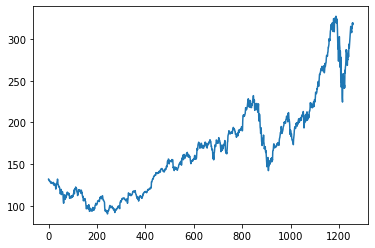

In [47]:
plt.plot(df3)